# Assignment 3: 2-Node Network

Instructions:

Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events

Brief Description: Small “musty” datasets like that from this 1941 study have proven very valuable in testing and
comparing new network algorithms.

- [Dataset](https://networkdata.ics.uci.edu/netdata/html/davis.html)
- [Python code to create dataset](https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html)

What can you infer about the relationships between (1) the women, and (2) the social events?  

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as net
from networkx.algorithms import bipartite
#!pip install nxviz
import pandas as pd
import nxviz as nv
import matplotlib.pyplot as plt
from nxviz import annotate

G = net.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]


print("Biadjacency matrix")
# This prints out all of the edges in the adjacency matrix that have a value of 1 - all the edges
print(bipartite.biadjacency_matrix(G, women, clubs))

# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print()
print("#Friends, Member")
for w in women:
    print(f"{W.degree(w)} {w}")

# project bipartite graph onto women nodes keeping number of co-occurrence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print()
print("#Friend meetings, Member")
for w in women:
    print(f"{W.degree(w, weight='weight')} {w}")

Biadjacency matrix
<Compressed Sparse Row sparse array of dtype 'int64'
	with 89 stored elements and shape (18, 14)>
  Coords	Values
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1

#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
1

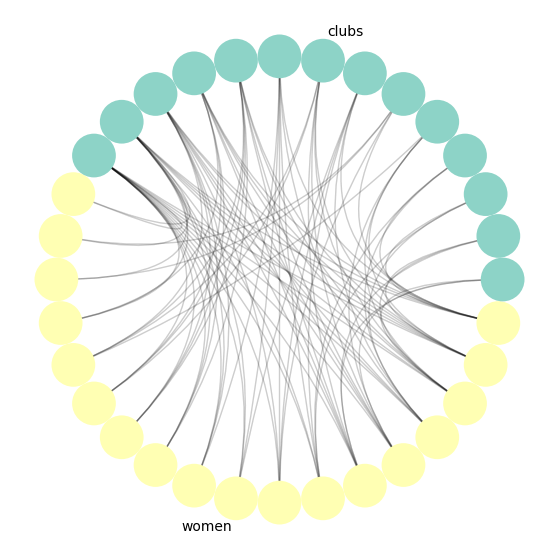

In [ ]:
# Initial visualization of the network
for n, d in G.nodes(data=True):
    G.nodes[n]["degree"] = G.degree(n)
    G.nodes[n]["group"] = "women" if G.nodes[n]['bipartite'] == 0 else "clubs"

fig, ax = plt.subplots(figsize=(7, 7))
nv.circos(
    G,
    sort_by="degree",
    group_by="group",
    node_color_by="group",
    node_enc_kwargs={"size_scale": 1},
)
annotate.circos_group(G, group_by="group")

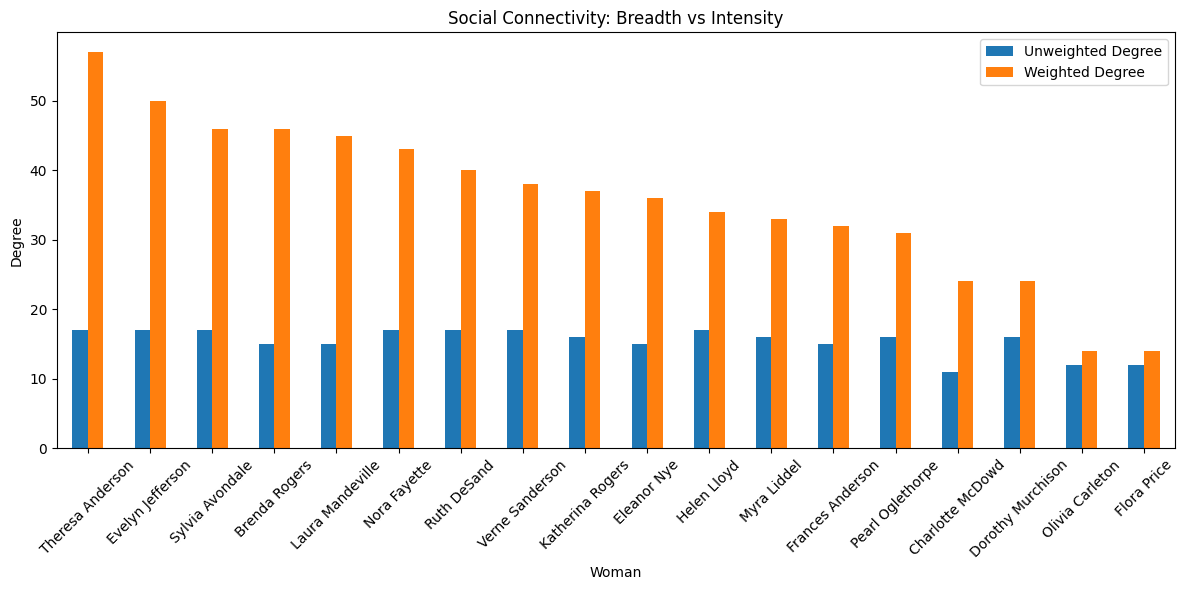

In [ ]:
# Degree Centrality
data = {
    "Woman": list(W.nodes()),
    "Unweighted Degree": [W.degree(w) for w in W.nodes()],
    "Weighted Degree": [W.degree(w, weight='weight') for w in W.nodes()]
}

df = pd.DataFrame(data).sort_values(by="Weighted Degree", ascending=False)

df.plot(x="Woman", y=["Unweighted Degree", "Weighted Degree"], kind="bar", figsize=(12,6))
plt.title("Social Connectivity: Breadth vs Intensity")
plt.ylabel("Degree")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# evaluate between centrality
betweenness = net.betweenness_centrality(W, weight='weight')
sorted(betweenness.items(), key=lambda x: x[1], reverse=True)


[('Olivia Carleton', 0.13628485485103134),
 ('Flora Price', 0.13628485485103134),
 ('Dorothy Murchison', 0.0957700693913929),
 ('Helen Lloyd', 0.06168870957473897),
 ('Frances Anderson', 0.057860644257703084),
 ('Myra Liddel', 0.053729389483065965),
 ('Katherina Rogers', 0.053729389483065965),
 ('Verne Sanderson', 0.0184643175451999),
 ('Sylvia Avondale', 0.0184643175451999),
 ('Charlotte McDowd', 0.01531862745098039),
 ('Nora Fayette', 0.01092436974789916),
 ('Eleanor Nye', 0.004551820728291317),
 ('Laura Mandeville', 0.003326330532212885),
 ('Brenda Rogers', 0.003326330532212885),
 ('Evelyn Jefferson', 0.0006684491978609625),
 ('Theresa Anderson', 0.0006684491978609625),
 ('Pearl Oglethorpe', 0.0006684491978609625),
 ('Ruth DeSand', 0.0006684491978609625)]

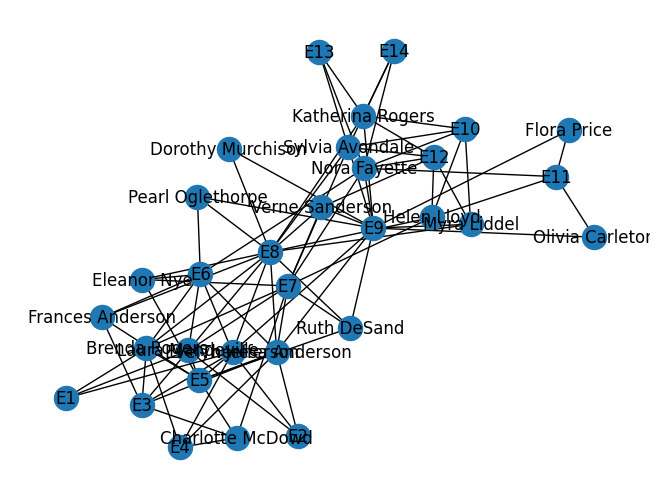

In [ ]:
# Plot the network

pos = net.spring_layout(G, seed=648)  # Seed layout for reproducible node positions
net.draw(G, pos, with_labels=True)
plt.show()

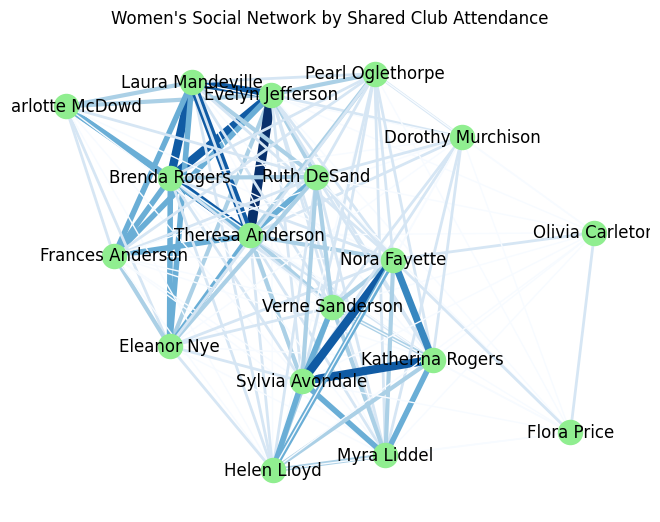

In [ ]:
# Plot the network with weights
pos = net.spring_layout(W, seed=42)
weights = [W[u][v]['weight'] for u, v in W.edges()]
net.draw(W, pos, with_labels=True, node_color='lightgreen',
         width=weights, edge_color=weights, edge_cmap=plt.cm.Blues)
plt.title("Women's Social Network by Shared Club Attendance")
plt.show()

Another way of visualizing the network is to organize the two types of nodes into a top and bottom rows with the edges connecting the two categories. This produces a graph that makes it a little easier to follow the connections between a woman and a club.

In [ ]:
# Re-plot the network with colors representing the clubs and women along
## Abbreviate the women's names to thier initals for easy reading

# Create a dictionary with all nodes as keys and for the women add their initals as values
node_dict = {}
for n in women+clubs:
    if " " in n:
        n_split = n.split(" ")
        node_dict[n] = "".join([n_split[0][0], n_split[1][0]])
    else:
        node_dict[n] = n

# Create a dictonary to map the category of node to a representative color
category_colors = {"women": "#9ea1d8",
                    "club": "#ffa500"}

# Construct dictionary to match the node label with the category
category_dict = {}
for n in node_dict.keys():
    if len(n) > 3:
        category_dict[node_dict[n]] = "women"
    else:
        category_dict[node_dict[n]] = "club"

# Finally create a list of node colors by mapping the node label with the category then matching it with color
node_colors = [category_colors.get(category_dict.get(node)) for node in node_dict.values()]

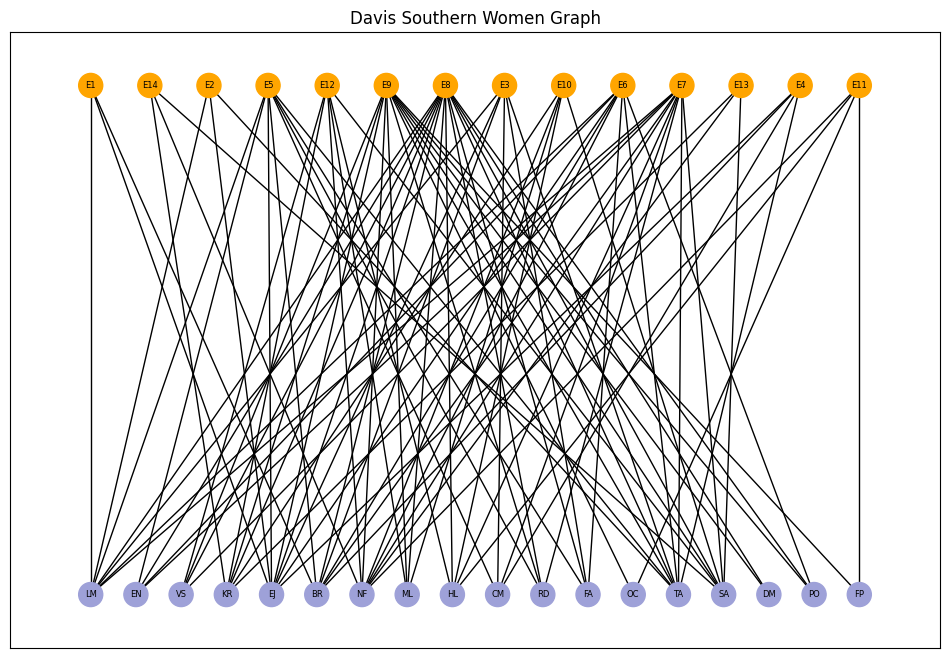

In [ ]:
# Re plot the network with labels and colors
plt.figure(figsize = (12, 8))

pos = net.spring_layout(G, seed=648)  # Seed layout for reproducible node positions
#net.draw(G, pos, with_labels=False, node_color=node_colors)

# Align the graph by node category
position = net.bipartite_layout(G, women, align="horizontal")

net.draw_networkx(G, pos = position, with_labels=False, node_color=node_colors)

# Now draw the custom labels (womens initials)
net.draw_networkx_labels(G, pos = position, labels=node_dict, font_size=6)

plt.title("Davis Southern Women Graph")
plt.show()

## Degree Metrics and Visualizations

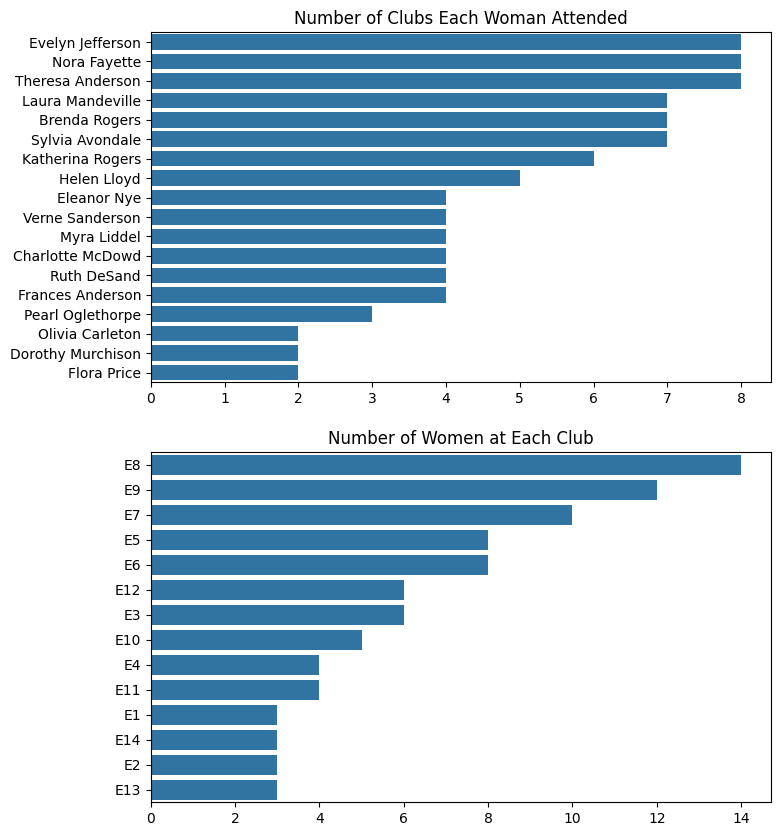

In [ ]:
# Obtain degree metrics from the Simple network
club_activity, women_activity = bipartite.degrees(G, women)

# Bar charts of activity

fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize=(8, 10))

women_degree_sorted = dict(sorted(women_activity, key=lambda item: item[1], reverse = True))
club_degree_sorted = dict(sorted(club_activity, key=lambda item: item[1], reverse = True))

sns.barplot(data = dict(women_degree_sorted),
            x = dict(women_degree_sorted).values(),
            y = dict(women_degree_sorted).keys(), ax = ax[0])
ax[0].set_title('Number of Clubs Each Woman Attended')

sns.barplot(data = dict(club_degree_sorted),
            x = dict(club_degree_sorted).values(),
            y = dict(club_degree_sorted).keys(), ax = ax[1])
ax[1].set_title('Number of Women at Each Club')


plt.show()

In [ ]:
C = bipartite.weighted_projected_graph(G, clubs)

club_centrality = pd.DataFrame({
    "Degree": dict(C.degree()),
    "Weighted Degree": dict(C.degree(weight='weight')),
    "Betweenness": net.betweenness_centrality(C, weight='weight'),
    "Closeness": net.closeness_centrality(C),
    "Eigenvector": net.eigenvector_centrality(C)
})

print(club_centrality.sort_values(by='Weighted Degree', ascending=False))

     Degree  Weighted Degree  Betweenness  Closeness  Eigenvector
E8       13               59     0.013889   1.000000     0.339336
E7       13               48     0.028846   1.000000     0.339336
E9       13               46     0.123932   1.000000     0.339336
E6       13               41     0.292491   1.000000     0.339336
E5        8               38     0.000000   0.722222     0.232251
E3        8               32     0.000000   0.722222     0.232251
E12       8               28     0.000000   0.722222     0.232251
E10       8               25     0.000000   0.722222     0.232251
E4        8               23     0.000000   0.722222     0.232251
E2        8               20     0.024573   0.722222     0.232251
E1        8               19     0.048199   0.722222     0.232251
E13       8               18     0.011233   0.722222     0.232251
E14       8               18     0.011233   0.722222     0.232251
E11       8               13     0.092552   0.722222     0.232251


Community 1: ['Dorothy Murchison', 'Evelyn Jefferson', 'Flora Price', 'Helen Lloyd', 'Katherina Rogers', 'Myra Liddel', 'Nora Fayette', 'Olivia Carleton', 'Pearl Oglethorpe', 'Ruth DeSand', 'Sylvia Avondale', 'Theresa Anderson']
Community 2: ['Brenda Rogers', 'Charlotte McDowd', 'Eleanor Nye', 'Frances Anderson', 'Laura Mandeville', 'Verne Sanderson']


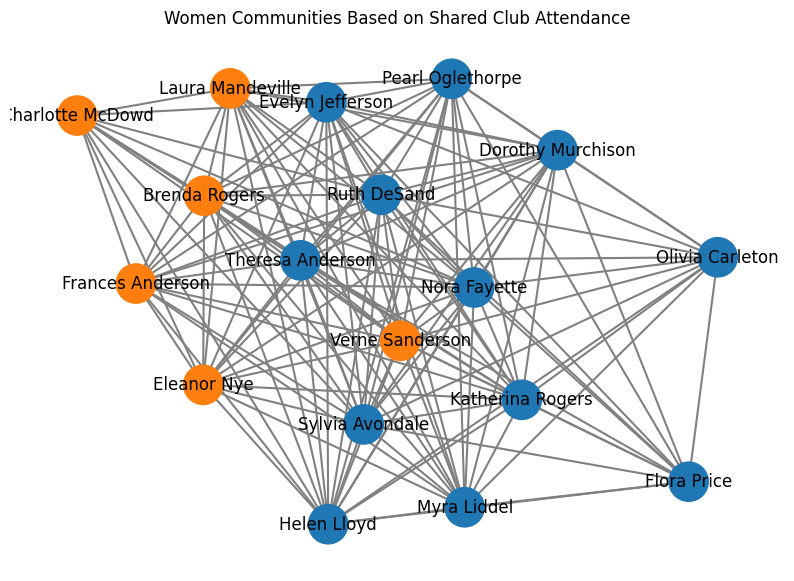

In [ ]:
#  Detect Women communities

from networkx.algorithms.community import greedy_modularity_communities

women_communities = list(greedy_modularity_communities(W))

# Print each community
for i, group in enumerate(women_communities):
    print(f"Community {i+1}: {sorted(group)}")

    # Assign colors to each community
community_colors = {}
color_palette = plt.cm.tab10.colors  # Up to 10 distinct colors

for i, comm in enumerate(women_communities):
    for woman in comm:
        community_colors[woman] = color_palette[i % len(color_palette)]

# Draw the graph
pos = net.spring_layout(W, seed=42)
plt.figure(figsize=(10, 7))
net.draw_networkx_nodes(W, pos,
                      node_color=[community_colors[n] for n in W.nodes()],
                      node_size=800)
net.draw_networkx_edges(W, pos, width=1.5, edge_color='gray')
net.draw_networkx_labels(W, pos)
plt.title("Women Communities Based on Shared Club Attendance")
plt.axis('off')
plt.show()

# **Summary**:

**Women:**

 Women with higher unweighted degree like 17 in this case shows that she is more socially connected, having attended clubs with nearly all other women.They share club attendance with other women. It shows breadth of social connection.

 Women with higher weighted degree like 57 in this case shows the times she co-attended clubs with other women. It shows intensity or depth of interaction.

 Based on the results, Theresa Anderson and Evelyn Jefferson are high in both unweighted and weighted and is likely a central figure in the social network.Charlotte McDowd, Olivia Carleton, Flora Price are lower in both,likely less socially active.

 However, Olivia Carleton and Flora Price lead the betweenness centrality, indicating they are key bridges between groups.

**Clubs:**

 E8, E7, E9, E6 have degree 13 and higher weighted degree and closeness of 1 ( maximum). So these are the most popular, connected and attended clubs. They're the social hubs.

 E6 has highest between centrality and may act as a bridge between subgroups of clubs. It connects women from different social circles.

 **Inference about the relationships between the two**

High-centrality clubs like E9 and E6 served as bridges between the two distinct women subgroups, facilitating more integrated social mixing.

Community Detection among women reveals two distinct women community groups,attending popular events( blue) or bridge events( yellow).
